In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from scipy import stats
import statistics
import matplotlib.gridspec as gridspec


In [49]:
data = pd.read_csv('ml_data_variable.csv')

df_year = data['Year']
df_coal = data['COAL, Thousand Short Tons']
df_naturalgas = data['NATURALGAS, Billion Cubic Feet']
df_electricity = data['ELECTRICITY, Million Kilowatthours']
df_petro_industrial = data['PETRO_INDUSTRIAL, Thousand Barrels per Day']
df_petro_residential = data['PETRO_RESIDENTIAL, Thousand Barrels per Day']
df_petro_commercial = data['PETRO_COMMERCIAL, Thousand Barrels per Day']
df_petro_transportation = data['PETRO_TRANSPORTATION, Thousand Barrels per Day']
df_petro_electricity = data['PETRO_ELECTRICPOWER, Thousand Barrels per Day']

df_co2 = data['CO2, Million Metric Tons']    

def Descriptiveanalysis(data, energy):
    # Calculate the statistics
    count = data.count()
    mean = data.mean()
    median = data.median()
    std_dev = data.std()
    std_error = data.sem()
    minimum = data.min()
    maximum = data.max()

    # Print the calculated statistics
    print(energy+':')
    print("Count:", count)
    print("Mean:", format(mean, ".2f"))
    print("Median:", format(median, ".2f"))
    print("Standard Deviation:", format(std_dev, ".2f"))
    print("Standard Error:", format(std_error, ".2f"))
    print("Minimum:", format(minimum, ".2f"))
    print("Maximum:", format(maximum, ".2f"))
    print('####################################')
    
Descriptiveanalysis(df_coal, 'Coal')
Descriptiveanalysis(df_naturalgas, 'Natural gas')
Descriptiveanalysis(df_electricity, 'Electricity')    
Descriptiveanalysis(df_petro_industrial, 'Petro industrial')
Descriptiveanalysis(df_petro_residential, 'Petro residential')
Descriptiveanalysis(df_petro_commercial, 'Petro commercial')
Descriptiveanalysis(df_petro_transportation, 'Petro transportation')
Descriptiveanalysis(df_petro_electricity, 'Petro electricity')


Coal:
Count: 600
Mean: 70904.29
Median: 72572.37
Standard Deviation: 17181.93
Standard Error: 701.45
Minimum: 26754.13
Maximum: 105786.70
####################################
Natural gas:
Count: 600
Mean: 1874.98
Median: 1808.37
Standard Deviation: 490.18
Standard Error: 20.01
Minimum: 939.93
Maximum: 3591.69
####################################
Electricity:
Count: 600
Mean: 275335.68
Median: 289808.33
Standard Deviation: 71671.16
Standard Error: 2925.96
Minimum: 139589.44
Maximum: 424013.45
####################################
Petro industrial:
Count: 600
Mean: 4669.55
Median: 4669.20
Standard Deviation: 467.41
Standard Error: 19.08
Minimum: 3500.95
Maximum: 6055.82
####################################
Petro residential:
Count: 600
Mean: 811.78
Median: 723.35
Standard Deviation: 425.50
Standard Error: 17.37
Minimum: 206.72
Maximum: 2948.51
####################################
Petro commercial:
Count: 600
Mean: 478.50
Median: 444.91
Standard Deviation: 189.69
Standard Error: 7.74
Minim

0      50578.608
1      45564.808
2      45402.955
3      43326.498
4      43999.759
         ...    
595    51704.667
596    40626.942
597    35007.109
598    35810.471
599    45104.313
Name: COAL, Thousand Short Tons, Length: 600, dtype: float64


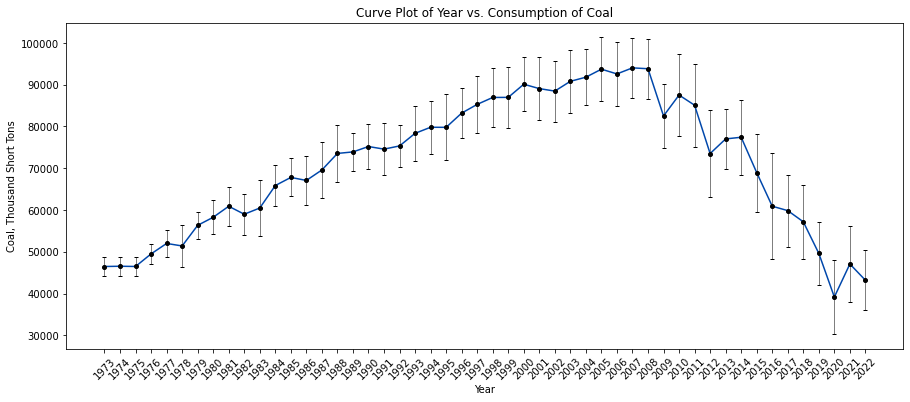

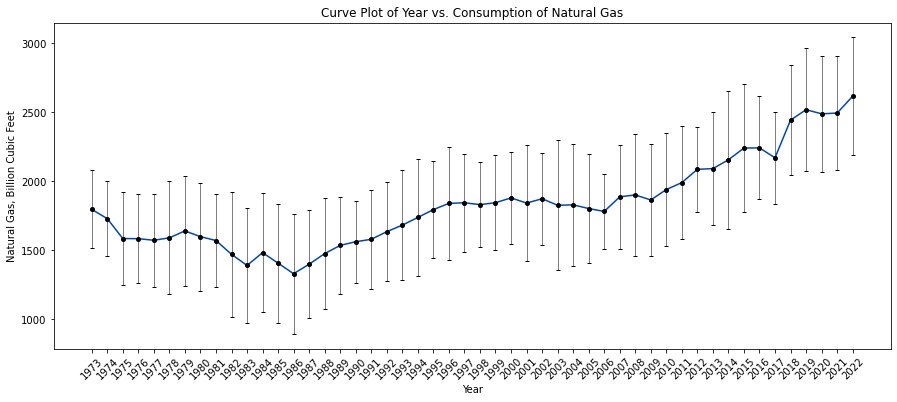

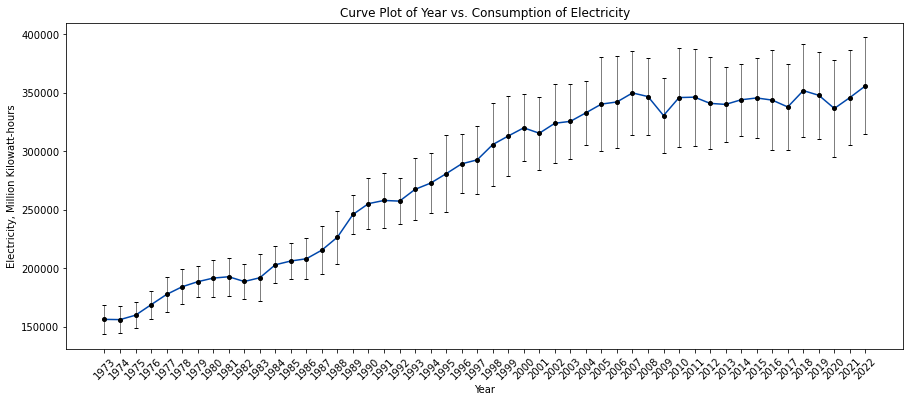

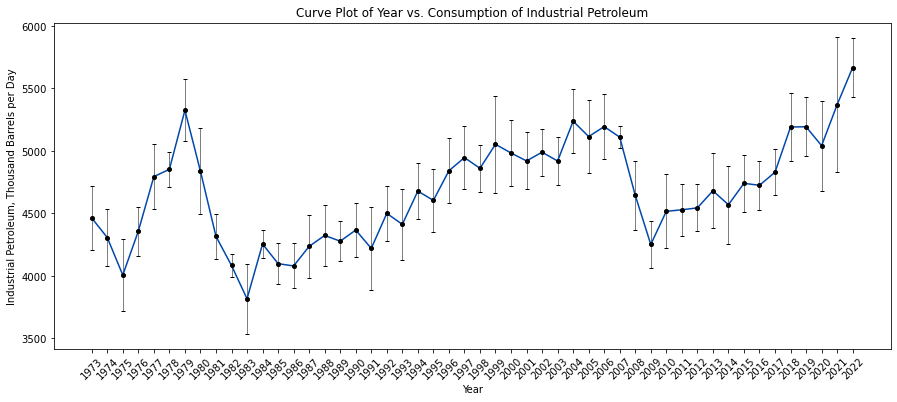

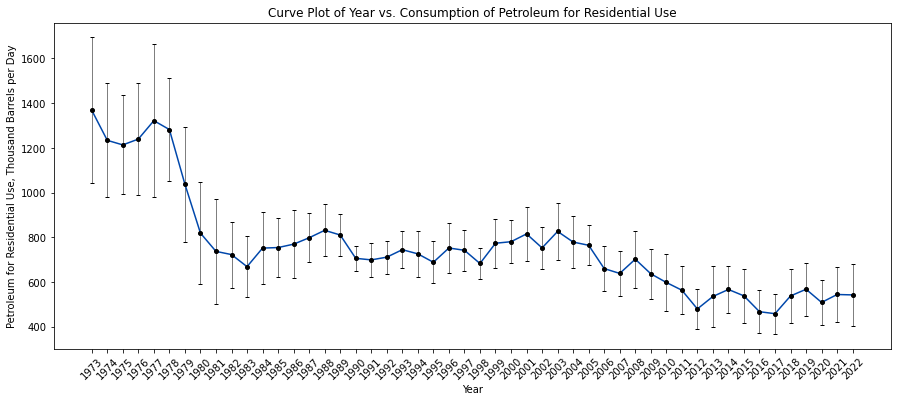

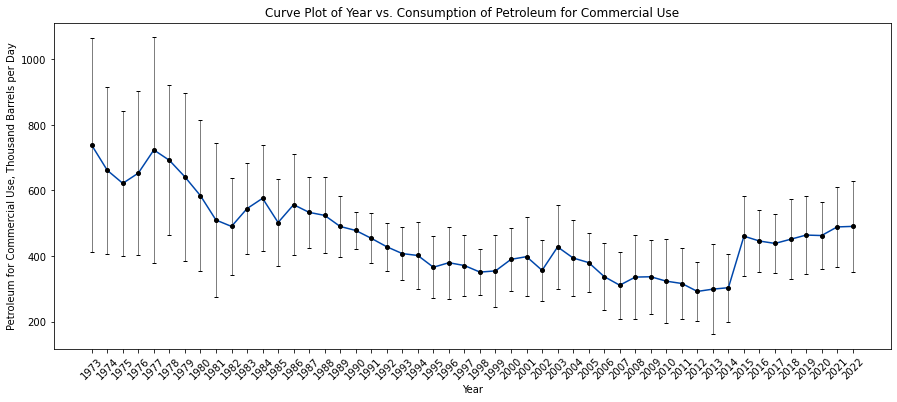

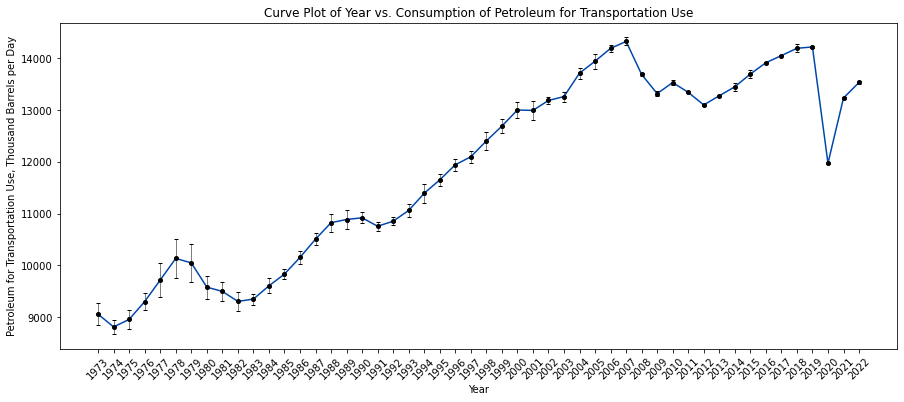

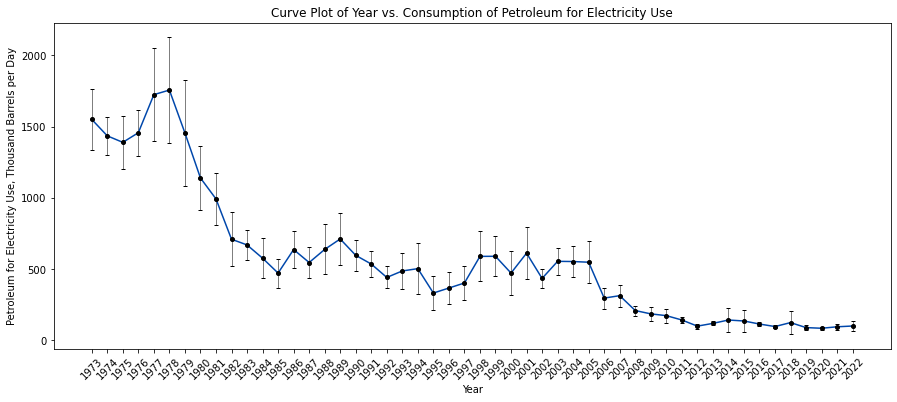

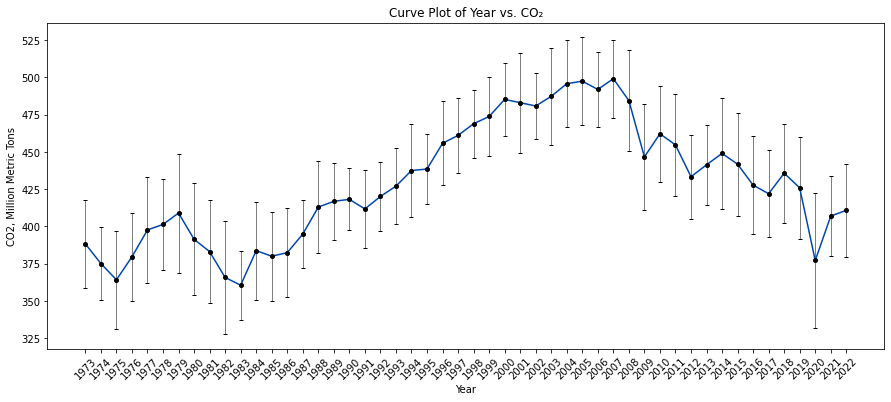

In [50]:
             


year_list = []
for i in df_year:
    if not str(i)[:4] in year_list:
        year_list.append(str(i)[:4])


def average12month(energy):
    averages, std_list = [], []
    for i in range(0, len(energy), 12):
        chunk = energy[i:i+10]
        avg = sum(chunk) / len(chunk)
        averages.append(avg)

        std = statistics.stdev(chunk)
        std_list.append(std)

    return [averages, std_list]



def plotfigure(year, average, error, unit):
    plt.figure(figsize=(15, 6))
    plt.plot(year, average, color = '#0047AB')
    plt.errorbar(year, average, yerr = error, fmt ='o', markersize=4, capsize=2, color = 'black', elinewidth=0.5)

    if unit == 'CO2, Million Metric Tons':
        plt.title('Curve Plot of Year vs. CO₂'.format(unit.split(',')[0]))
        plt.xlabel('Year')
        plt.ylabel(unit)

        plt.xticks(year_list, year_list, rotation=45)
        plt.savefig('Curve_Plot_Year_CO2.png')
        # Display the plot
        plt.show()

    
    else:
        plt.title('Curve Plot of Year vs. Consumption of {}'.format(unit.split(',')[0]))
        plt.xlabel('Year')
        plt.ylabel(unit)

        plt.xticks(year_list, year_list, rotation=45)
        plt.savefig('Curve_Plot_Year_Consumption_{}.png'.format(unit.split(',')[0]))
        # Display the plot
        plt.show()

    
    
print(df_coal)    
coal_average = average12month(df_coal)[0]
coal_error = average12month(df_coal)[1]
coal_plot = plotfigure(year_list, coal_average, coal_error, 'Coal, Thousand Short Tons')




naturalgas_average = average12month(df_naturalgas)[0]
naturalgas_error = average12month(df_naturalgas)[1]
naturalgas_plot = plotfigure(year_list, naturalgas_average, naturalgas_error, 'Natural Gas, Billion Cubic Feet')


electricity_average = average12month(df_electricity)[0]
electricity_error = average12month(df_electricity)[1]
electricity_plot = plotfigure(year_list, electricity_average, electricity_error, 'Electricity, Million Kilowatt-hours')

petro_industrial_average = average12month(df_petro_industrial)[0]
petro_industrial_error = average12month(df_petro_industrial)[1]
petro_industrial_plot = plotfigure(year_list, petro_industrial_average, petro_industrial_error, 'Industrial Petroleum, Thousand Barrels per Day')


petro_residential_average = average12month(df_petro_residential)[0]
petro_residential_error = average12month(df_petro_residential)[1]
petro_residential_plot = plotfigure(year_list, petro_residential_average, petro_residential_commercial_error, 'Petroleum for Residential Use, Thousand Barrels per Day')

petro_commercial_average = average12month(df_petro_commercial)[0]
petro_commercial_error = average12month(df_petro_commercial)[1]
petro_commercial_plot = plotfigure(year_list, petro_commercial_average, petro_commercial_error, 'Petroleum for Commercial Use, Thousand Barrels per Day')


petro_transportation_average = average12month(df_petro_transportation)[0]
petro_transportation_error = average12month(df_petro_transportation)[1]
petro_transportation_plot = plotfigure(year_list, petro_transportation_average, petro_transportation_commercial_error, 'Petroleum for Transportation Use, Thousand Barrels per Day')

petro_electricity_average = average12month(df_petro_electricity)[0]
petro_electricity_error = average12month(df_petro_electricity)[1]
petro_electricity_plot = plotfigure(year_list, petro_electricity_average, petro_electricity_error, 'Petroleum for Electricity Use, Thousand Barrels per Day')

co2_average = average12month(df_co2)[0]
co2_error = average12month(df_co2)[1]
co2_plot = plotfigure(year_list, co2_average, co2_error, 'CO2, Million Metric Tons')




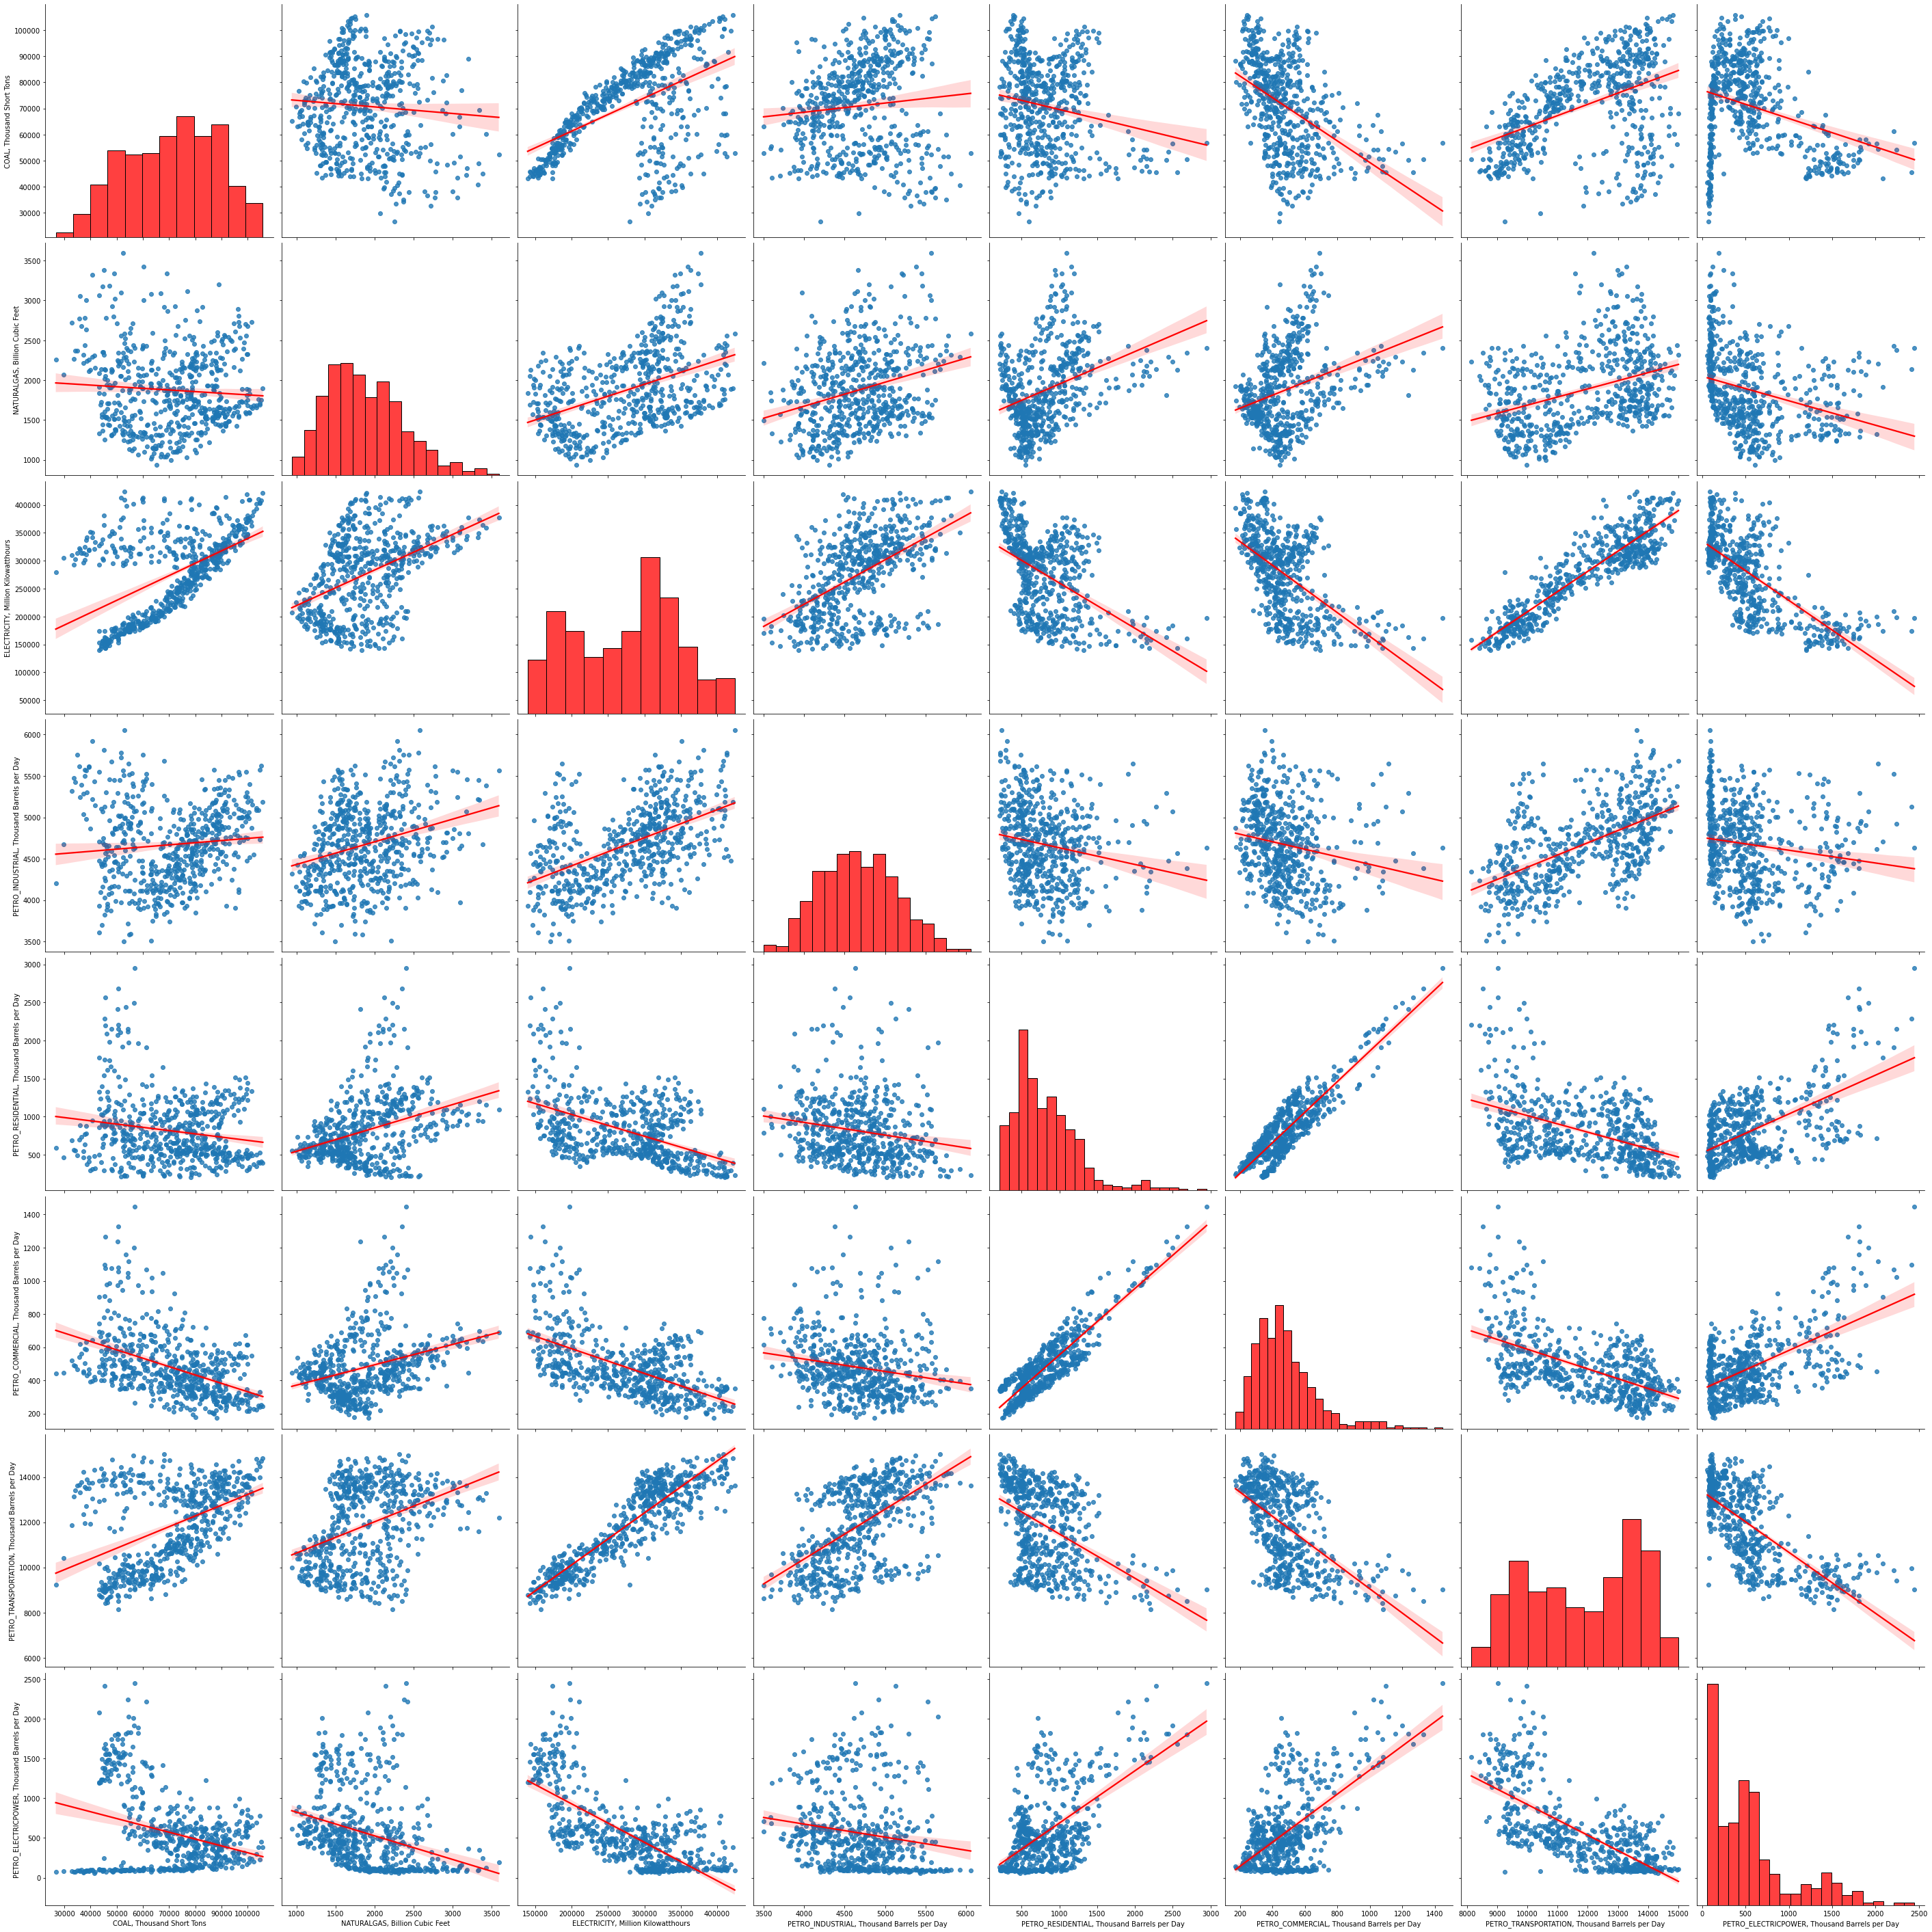

In [53]:
total_co2 = pd.read_csv('Carbon_Dioxide_Emissions_From_Energy.csv')
COAL = pd.read_csv('COAL_clean_total_consumption.csv')
NATURALGAS = pd.read_csv('NATURAL_GAS_clean_total_consumption.csv')
ELECTRICITY = pd.read_csv('ELECTRICITY_NET_GENERATION_clean_total_consumption.csv')
PETRO_INDUSTRIAL = pd.read_csv('PETROLEUM_INDUSTRIAL_clean_total_consumption.csv')
PETRO_RESIDENTIAL_COMMERCIAL = pd.read_csv('PETROLEUM_RESIDENTIAL_COMMERCIAL_clean_total_consumption.csv')
PETRO_TRANSPORTATION_ELECTRICPOWER = pd.read_csv('PETROLEUM_TRANSPORTATION_ELECTRICPOWER_clean_total_consumption.csv')

 
df_coal = data['COAL, Thousand Short Tons']
df_naturalgas = data['NATURALGAS, Billion Cubic Feet']
df_electricity = data['ELECTRICITY, Million Kilowatthours']
df_petro_industrial = data['PETRO_INDUSTRIAL, Thousand Barrels per Day']
df_petro_residential = data['PETRO_RESIDENTIAL, Thousand Barrels per Day']
df_petro_commercial = data['PETRO_COMMERCIAL, Thousand Barrels per Day']
df_petro_transportation = data['PETRO_TRANSPORTATION, Thousand Barrels per Day']
df_petro_electricity = data['PETRO_ELECTRICPOWER, Thousand Barrels per Day']

df_co2 = data['CO2, Million Metric Tons']    








data_variable = pd.DataFrame({'COAL, Thousand Short Tons': df_coal.values.tolist(),
                   'NATURALGAS, Billion Cubic Feet': df_naturalgas.values.tolist(),
                   'ELECTRICITY, Million Kilowatthours': df_electricity.values.tolist(),
                   'PETRO_INDUSTRIAL, Thousand Barrels per Day': df_petro_industrial.values.tolist(),
                   'PETRO_RESIDENTIAL, Thousand Barrels per Day': df_petro_residential.values.tolist(),
                   'PETRO_COMMERCIAL, Thousand Barrels per Day': df_petro_commercial.values.tolist(),
                   'PETRO_TRANSPORTATION, Thousand Barrels per Day': df_petro_transportation.values.tolist(),           
                   'PETRO_ELECTRICPOWER, Thousand Barrels per Day': df_petro_electricity.values.tolist()
                   #'CO2, Million Metric Tons': Yco2.values.tolist()
                  })

#data_variable.to_csv('ml_data_variable.csv', index=False)
#sns.pairplot(data = data_variable, height = 5)
g = sns.pairplot(data = data_variable, kind='reg', diag_kws={'color':'red'}, plot_kws={'line_kws':{'color':'red'}}, height = 5)
g.savefig('Pairplot_Plot_Energy_Consumption.png', dpi=300)
